## Parking Lot

In [11]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import numpy as np
from matplotlib import pyplot as plt

In [12]:
datagen = ImageDataGenerator(
    rescale=1./255,
)

In [13]:
generator = datagen.flow_from_directory(
    'data/data fruit',
    target_size=(50, 50),
    batch_size=32,
    class_mode='categorical'
)

Found 19526 images belonging to 3 classes.


In [14]:
class_to_quality = {i: quality for i, quality in enumerate(generator.class_indices)}
class_indices = generator.class_indices
classes = generator.classes
class_counts = {class_name: sum(classes == class_index) for class_name, class_index in class_indices.items()}
print(class_counts)

{'Bad Quality_Fruits': 6788, 'Good Quality_Fruits': 11664, 'Mixed Qualit_Fruits': 1074}


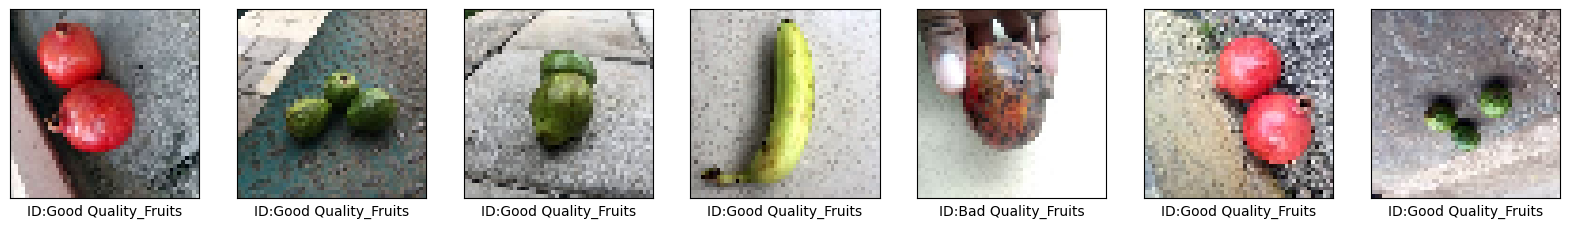

In [16]:
x_train, y_train = generator.next()
y_train = np.argmax(y_train, axis=1)
class_quality = [class_to_quality[quality] for quality in y_train]
plt.figure(figsize=(20,10))
for i in range(7):
    plt.subplot(1,7,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(x_train[i], cmap='gray')
    plt.xlabel(f"ID:{class_quality[i]}")
plt.show()